
## **Problem Statement**

# Have you ever wondered when the best time of year to book a hotel room is? Or the optimal lenght of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special request? 

# This hotel booking dataset can help you explore those question! This dataset contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. 

# **Explore and analyse the data to discover important factors that govern the bookings.**

# ***Business Objective*** - We have given the dataset of hotel booking, In the provided dataset contains the information of Hotel type , Meal type, Stay duration , etc. While any tour or trip I don't want to pay any amount randomly, rather I will pay some optimized money for stay. And I wan't my vacation to be safe with good stay and good meal with optimized money. 

# This analysis will help the tourist to choose the right hotel,right price, Proper and safe stay also it helps Hotel Management to take right decision for making any changes in service level.

# Step 1: Know your data 

In [ ]:
# Importing the required library
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset Loading 

In [ ]:
# Mount the drive to the notebook 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the dataset from the drive
df_data = pd.read_csv("/content/drive/My Drive/EDA - HOTEL BOOKING ANALYSIS/Hotel Bookings.csv")

FileNotFoundError: ignored

# Dataset First View

In [ ]:
# Let's make a copy of our data , so original data will not be affect
df = df_data.copy()

In [ ]:
#Let's take a first view of data 
df.head()

In [ ]:
df.tail()

In [ ]:
# Check the dataset row and column 
df.shape

# Dataset Information 

In [ ]:
# Let's check the info of the data 
df.info()

In [ ]:
df.describe()

# Missing Values/Null Values

In [ ]:
#Checking the total null values in data
df.isnull().sum()

In [ ]:
# In this above Null data
# 4 null values present in 'Children'
# 488 null values present in 'country'
# 16340 null values present in 'agent'
# 112593 null values present in 'company'

#As 'Company' has huge amount of Null values so we will drop this column to make further analysis easy

In [ ]:
df.drop(['company'], axis=1, inplace = True)

In [ ]:
# Now we will fill remaining null data with zero
df['children'].fillna(value = 0, inplace = True)
df['agent'].fillna(value = 0, inplace = True)
df['country'].fillna(value = 'Others', inplace = True)

In [ ]:
# Verify again the data 
df.isnull().sum()

# Hence no any null value pending in this dataset now we are ready to go ahead

In [ ]:
# Checking the data types 
df.dtypes

# **Step 2: Understanding Your Variables**

In [ ]:
# Dataset Describe
df.describe()

# **Variables Description**
Some of important varibales
1. hotel: type of hotels
2. is_canceled: canceled or not
3. lead_time: no. of days before actual
arrival in the hotel
4. arrival_date_year: year of booking
5. arrival_date_month: month of booking
6. arrival_date_week_number: week
number of the year in which booking
7.arrival_date_day_of_month: arrival
month date
8. stays_in_weekend_nights: no. of
weekends guest stayed
9. stays_in_week_nights: no. of weekdays
guest stayed
10. meal: BB – Bed & Breakfast
HB – only two meals including
breakfast meal
FB – breakfast, lunch, and dinner
11. market_segment: TA: Travel agents
TO: Tour operators
12. previous_cancellations: cancellation in
past
13. previous_bookings_not_canceled: not
canceled in the past.

# Data Wrangling

In [ ]:
# Adding some extra column like total number of stay and revenue
df['total_num_of_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [ ]:
#Calculating revenue and adding into a data
df['revenue'] = df['total_num_of_stay']*df['adr']

In [ ]:
df.info()

In [ ]:
# In is_cancelled column boolean values are present hence lets convet into a string 
df['is_cancelled'] = df.is_canceled.replace(to_replace = [1,0], value = ['canceled', 'not_canceled'])

In [ ]:
df['is_cancelled']

# We have added column revenue and total num of stay, also we have changed is_cancelled column with appropriate data 

# **Step 3: Data Vizualization, Storytelling and Experimenting with charts**

# Q.1 Which hotel is more preferred by customers?

In [ ]:
# Let's us use the data visualization tool to find the hotel preference
plt.rcParams['figure.figsize'] = (8,8)

#Lets give the type of chart, colour and size
df['hotel'].value_counts().plot(kind='pie', colors = ['orange','yellow'], autopct='%.0f%%', fontsize = 16)
plt.title('Types of Hotel', fontsize = 18)
plt.ylabel('hotel', fontsize = 16)



*   **Above pie chart city hotel has more preference than the Resort hotel**
*   **City hotel have 66% preference and Resort hotel have 34% preference**





# Q 2 Check the cancellation data using data visualization 

In [ ]:
# Let's plot the chart to show the data 
df.is_canceled.value_counts().plot(kind='pie', colors = ['green', 'pink'], autopct='%.0f%%', fontsize = 16)
plt.title('Cancelation Plot for Hotel Booking Customers', fontsize = 18)
plt.ylabel('count', fontsize = 16)



*   **The plot shows 37% bookings were canceled by the customers over 63% is
not canceled**








# Q 3 Let's check it out the arrival data 

In [ ]:
# Lets check the data by year
arrival_by_year = df[['arrival_date_year','hotel']].value_counts().groupby('arrival_date_year').sum()

In [ ]:
# Lets print the plot 
plt.rcParams['figure.figsize'] = (10,8)
arrival_by_year.plot(kind='bar', color = ['pink', 'blue','yellow'], fontsize = 16)
plt.title('Year Wise Bookings', fontsize = 18)
plt.xlabel('Arrival Year', fontsize = 15)
plt.ylabel('Count of arrival', fontsize = 15)

*   **We can observed that in the year 2016 arrival is more than double of the previous year but also** 


*   **it is observed that arrival has been fallen down in 2017. Hotel Management need to check for the same**








In [ ]:
# Let's calculate for both hotels
# Ploting the graph for both hotel 
plt.rcParams['figure.figsize'] = (10,6)
sns.countplot(data = df, x = 'arrival_date_year', hue = 'hotel')
plt.title('Arrival per year for each hotel', fontsize = 18)
plt.xlabel('Arrival Year', fontsize = 14)
plt.ylabel('Count of arrival', fontsize = 14)



*   **We can observe that number of arrivals seems to be high in year 2016 for city hotel compared to Resort Hotel, while the bookings seem to be less in 2015 and 2017 for both resort hotel and city hotel.** 









In [ ]:
# let's us check arrival per month 
# Creating the plot arrival per month
plt.rcParams['figure.figsize'] = (22,7)
sns.countplot(data = df, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February','March', 'April','May','June','July','August','September','October','November','December'])
plt.title('Arrival per month for each hotel', fontsize = 18)
plt.xlabel('Arrival Month', fontsize = 14)
plt.ylabel('Count of Arrival', fontsize = 14)



*   **We observed that for initial month of the year arrival is less compared to mid-months.**


*   **For month May, June,July and August maximum arrival has been seen**

*   **for last 2 months trends follows with Jan and Feb Month** 




In [ ]:
# Lets check more preferred country 
# We will consider only top 10 countries
most_preferred_country = df['country'].value_counts().head(10)
most_preferred_country

In [ ]:
#let's print on the plot 
plt.rcParams['figure.figsize'] = (20,10)
most_preferred_country.plot(kind='bar', color = ['yellow'], fontsize = 12)
plt.title('Preference by Country', fontsize = 18)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)

* **Most preferred country is PRT followed by GBR**   



# Q 4 Let us visulize the cancellation data 

In [ ]:
#Lets find the cancelled booking
cancelation_data = df.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()

In [ ]:
cancelation_data

In [ ]:
# let's analyze using the plot 
plt.rcParams['figure.figsize'] = (12,5)
cancelation_data.plot(kind = 'bar', color = ['greenyellow', 'blue'], fontsize = 12)
plt.title('Cancelation Data for Hotel (0 = Not Cancelled and 1 = Cancelled)', fontsize = 18)
plt.xlabel('Hotel Type', fontsize = 14)
plt.ylabel('Count', fontsize = 14)



*  **We observed that city hotel have more cancellation than the Resort hotel hence Hotel Management need to take proper decision to minimize the cancellation**  



# Q 5 Analysis the data on the basis of ADR (Average Daily Count Rate)

In [ ]:
# Let's find out of Average ADR for types of hotel
average_adr_hotel = df.groupby(['hotel'])['adr'].mean()
average_adr_hotel


In [ ]:
#let's visualize using plot
plt.rcParams['figure.figsize'] = (10,6)
average_adr_hotel.plot(kind = 'bar', color = ['skyblue', 'orange'], fontsize = 10)
plt.title('ADR on the basis of Hotel Type')
plt.xlabel('Hotel Type', fontsize = 14 )
plt.ylabel('Average ADR', fontsize = 14)



*    **ADR for city hotel is slightely more than Resort Hotel**





In [ ]:
# Let's check ADR for top 10 countries
country_adr = df.groupby(['country'])['adr'].mean().sort_values(ascending = False)[0:10]

country_adr

In [ ]:
# Let's check with the graph
plt.rcParams['figure.figsize'] = (14,8)
country_adr.plot(kind = 'bar', color = 'skyblue', fontsize = 10)
plt.title('ADR for top 10 countries')
plt.xlabel('Country', fontsize = 12 )
plt.ylabel('Average ADR', fontsize = 12)


*   **We can see DJI have highest ADR comparing to all other countries**




In [ ]:
# Let's Now we will check the ADR for different month and year
month_year_adr = df.groupby(['arrival_date_month','arrival_date_year'])['adr'].mean()

In [ ]:
month_year_adr

In [ ]:
# Let's do the visulization 
line,ax = plt.subplots(figsize=(18,5))
sns.lineplot(x='arrival_date_month', y='adr', data=df, hue='arrival_date_year', palette='dark')
ax.set_title('ADR for Month and Year', fontsize = 18)
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('ADR', fontsize = 14)



*  **As per above line plot we can clearly seen that Hotel Business scaling up each and every year**




# Q 6 Lets check the Daily rate  

In [ ]:
# Let's we will calculate 
# Let us initially calculate the not cancelled booking 
not_cancelled_guests = df.loc[df['is_canceled']==0]

In [ ]:
# Now we will calculate the price per guest 
# New column has been added in our data as price
df['price'] = not_cancelled_guests['adr']*not_cancelled_guests['total_num_of_stay']
df.head()

In [ ]:
#let's visualize the data by using lineplot using month
plt.rcParams['figure.figsize'] = (15,6)
sns.lineplot(data=df, x =df['arrival_date_month'], y=df['price'], hue='hotel')
plt.title('Month-wise Price Paid for stay by Guests', fontsize = 12)
plt.xlabel('Month', fontsize = 12 )
plt.ylabel('Price paid for Stay', fontsize = 12)

*   **We observed that price paid by guest in city hotel is lower than the Resort Hotel**


*   **Price of Resort Hotel are more than City Hotel in Month of June, July, August, September. For rest of the months, Price of city Hotel are consistently higher thar Resort Hotel** 

# Q 7 Analysis using Correlation Heatmap

In [ ]:
plt.rcParams['figure.figsize'] = 24,12
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True);

*   **Focus on revenue, stay_in_week_nights total_num_of_stay , we can verify that, revenue were almost same for stay_in_week_nights and total_num_of_stay**


*   **Also it is obsereved that stay_in_week_nights was more than the weekend night stay**

# **Conclusions**

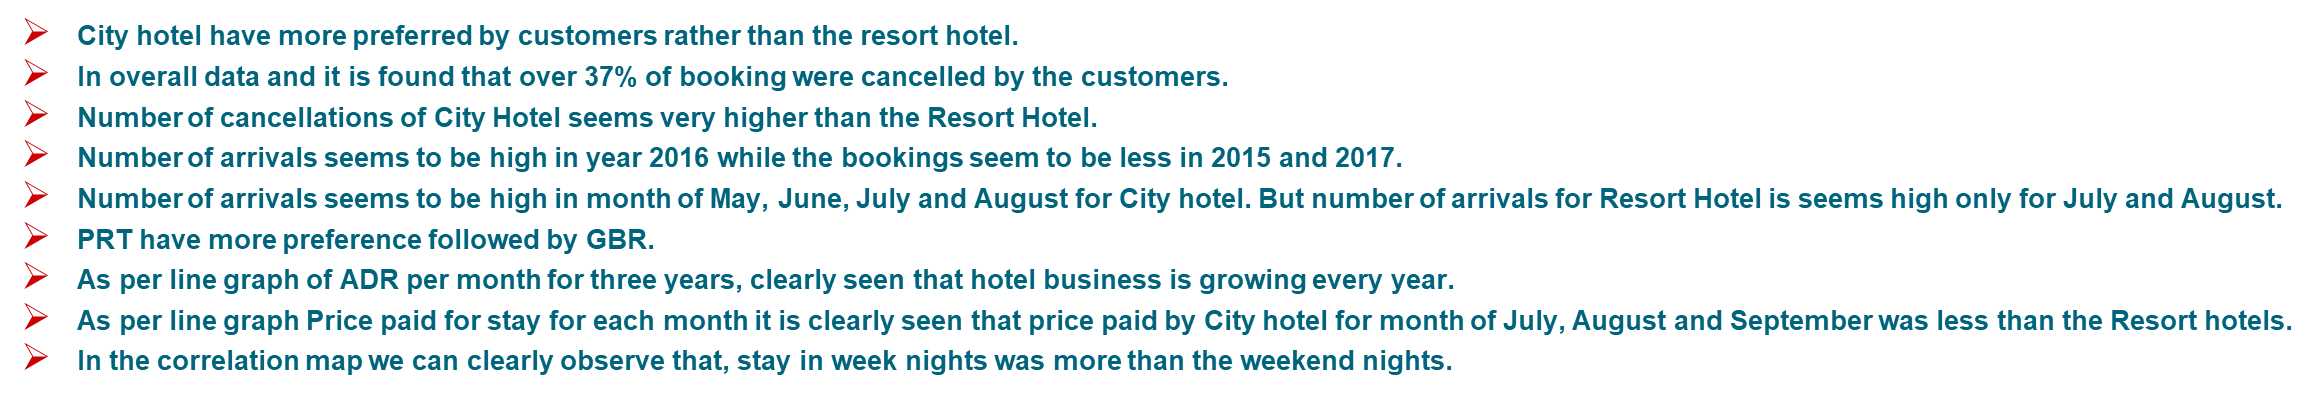